In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [50]:
# Load Traffic Volume Dataset
df= pd.read_csv("traffic.csv")

In [51]:
print(df.head())

              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


In [52]:
# Convert DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [53]:
# Extract time-based features
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Weekend'] = (df['DayOfWeek'] >= 5).astype(int)  # 1 if weekend, else 0

In [54]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 DateTime     0
Junction     0
Vehicles     0
ID           0
Year         0
Month        0
Day          0
Hour         0
DayOfWeek    0
Weekend      0
dtype: int64


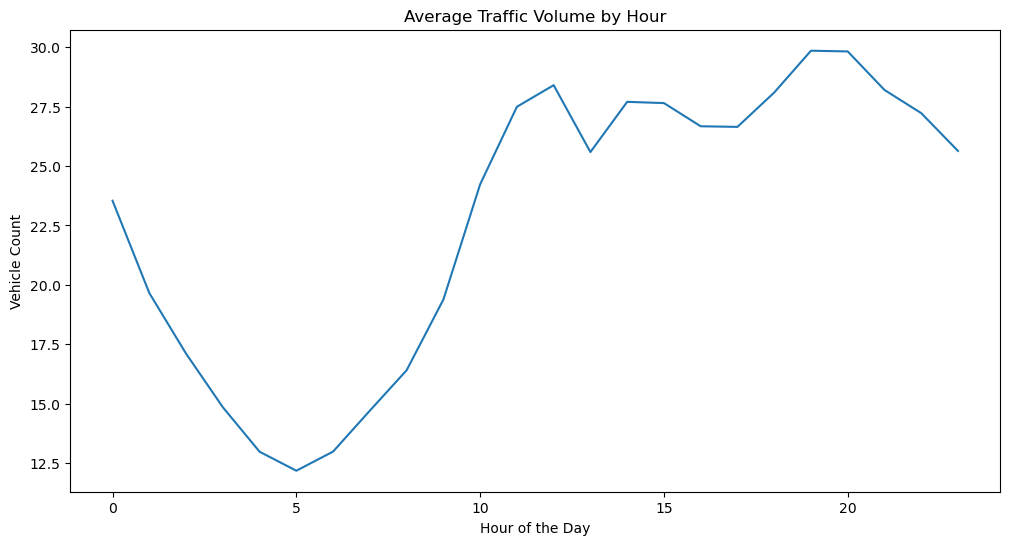

In [55]:
# Exploratory Data Analysis (EDA)

## 1. Traffic trend analysis by Hour


plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Vehicles', data=df, errorbar=None)
plt.title("Average Traffic Volume by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Vehicle Count")
plt.show()

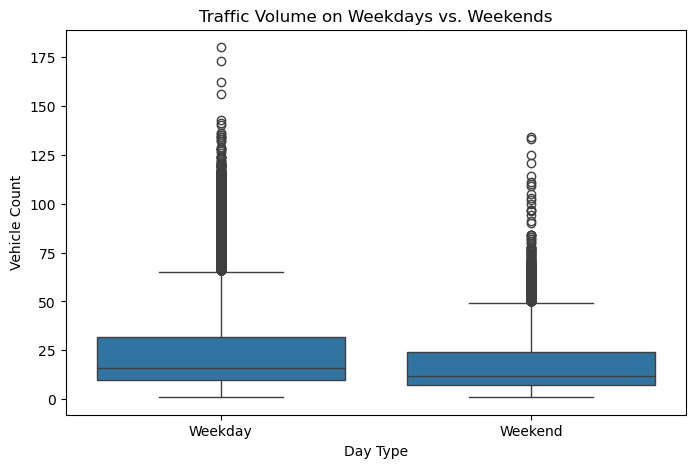

In [56]:
## 2. Traffic Volume on Weekends vs Weekdays


plt.figure(figsize=(8, 5))
sns.boxplot(x='Weekend', y='Vehicles', data=df)
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.title("Traffic Volume on Weekdays vs. Weekends")
plt.xlabel("Day Type")
plt.ylabel("Vehicle Count")
plt.show()

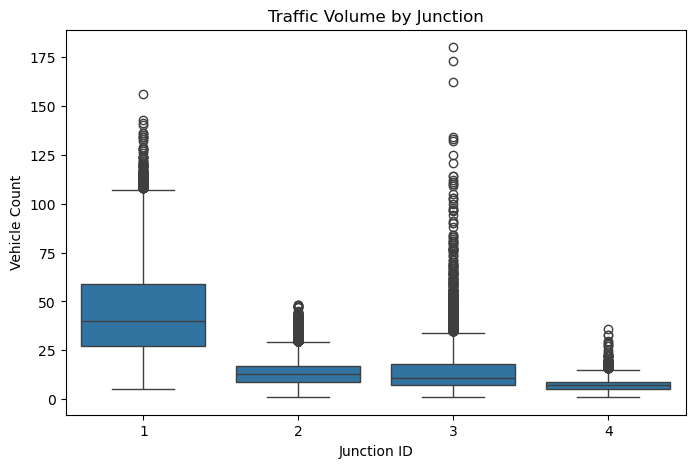

In [57]:
## 3. Traffic Volume by Junctions


plt.figure(figsize=(8, 5))
sns.boxplot(x='Junction', y='Vehicles', data=df)
plt.title("Traffic Volume by Junction")
plt.xlabel("Junction ID")
plt.ylabel("Vehicle Count")
plt.show()

In [58]:
# Feature Selection

X = df.drop(columns=['Vehicles'])  
y = df['Vehicles']  

In [59]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Drop DateTime column before scaling
X_train = X_train.drop(columns=['DateTime'], errors='ignore')
X_test = X_test.drop(columns=['DateTime'], errors='ignore')

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Model Training - RandomForestRegressor


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [63]:
# Predictions

y_pred = model.predict(X_test_scaled)

In [64]:
# Model Evaluation

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [65]:
print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 2.37
Mean Squared Error (MSE): 12.21
Root Mean Squared Error (RMSE): 3.49
R² Score: 0.97


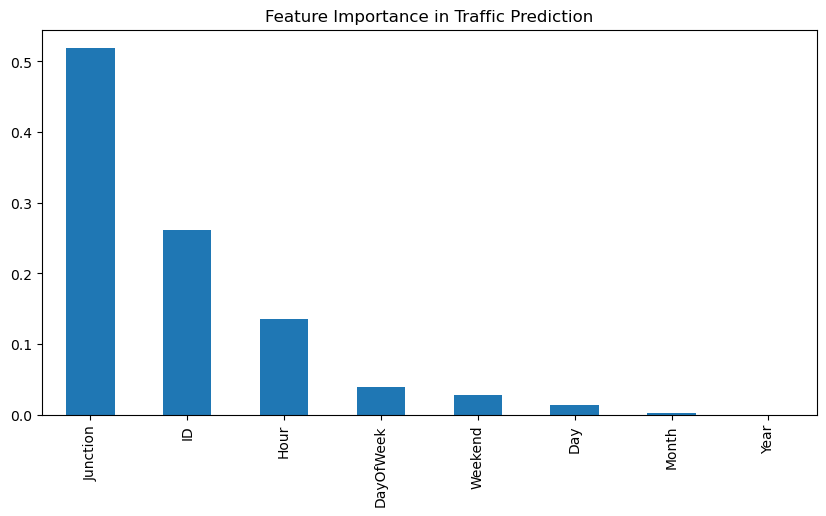

In [67]:
feature_names = X_train.columns
feature_importance = pd.Series(model.feature_importances_, index=feature_names)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importance in Traffic Prediction")
plt.show()
